# Analysis

## Setup

In [15]:
d = read.csv("../data/wiki/users.csv", header = TRUE)
library(lsr)
head(d)

user,edit_count,gender,numerical_id,admin_ascension,admin,coord_given_conjunctions,coord_given_articles,coord_given_prepositions,coord_given_adverbs,⋯,links,adverbs,articles,auxiliary_verbs,conjunctions,impersonal_pronouns,personal_pronouns,prepositions,quantifiers,perplexity
Spidern,3835,unknown,8121704,,False,0.00000000,0.0000000,0.000000000,0.00000000,⋯,1.0000000,0.8333333,1.0000000,1.0000000,0.8333333,1.0000000,1.0000000,0.8333333,0.5000000,166.250880
Politics rule,3788,unknown,4044194,,False,0.01428571,-0.1190476,0.285714286,0.07142857,⋯,0.0000000,0.5454545,0.1818182,0.4090909,0.4545455,0.2272727,0.5909091,0.5909091,0.1818182,146.948879
Spiderr,26,unknown,1190482,,False,NA,NA,NA,NA,⋯,1.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,86.968513
Dogears,10174,unknown,733091,,False,NA,NA,NA,NA,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,3.205881
Anonymous Paul,347,male,12191401,,False,NA,NA,NA,NA,⋯,0.0000000,0.5000000,0.0000000,0.0000000,0.5000000,0.0000000,0.5000000,0.5000000,0.5000000,326.737959
Woody,29905,male,1476994,,False,0.03578947,0.0122807,0.003634085,0.03042362,⋯,0.4140127,0.8980892,0.8343949,0.8471338,0.8407643,0.8535032,0.9044586,0.9299363,0.5668790,143.753417


In [16]:
# d <- subset(d, eigen_central < 0.6) # eliminates 2 outliers
d.admin <- subset(d, admin == "True")
d.nonadmin <- subset(d, admin == "False")
d.higheigen <- subset(d, eigen_central_bin == "True")
d.loweigen <- subset(d, eigen_central_bin == "False")

In [17]:
d.higheigen.admin <- subset(d, eigen_central_bin == "True" & admin == "True")
d.higheigen.nonadmin <- subset(d, eigen_central_bin == "True" & admin == "False")
d.loweigen.admin <- subset(d, eigen_central_bin == "False" & admin == "True")
d.loweigen.nonadmin <- subset(d, eigen_central_bin == "False" & admin == "False")

# nrow(d.loweigen.admin) # 1703
# nrow(d.higheigen.admin) # 77
# nrow(d.higheigen.nonadmin) # 120
# nrow(d.loweigen.nonadmin) # 20197

## Replicating *Centre Stage* results

Relationship between power (adminship & centrality) and coordination.

In [7]:
# Coordination received vs. eigenvector centrality
cor.test(d$eigen_central, d$agg_coord_received, alternative="greater", method="spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  d$eigen_central and d$agg_coord_received
S = 9.8413e+11, p-value < 2.2e-16
alternative hypothesis: true rho is greater than 0
sample estimates:
      rho 
0.2041492 


In [8]:
# Do highgly central and non-central users receive different amounts of coordination? YES
t.test(d.loweigen$agg_coord_received, d.higheigen$agg_coord_received)
cohensD(d.loweigen$agg_coord_received, d.higheigen$agg_coord_received)
# Do admins and non-admins receive different amounts of coordination? YES
t.test(d.nonadmin$agg_coord_received, d.admin$agg_coord_received)
cohensD(d.nonadmin$agg_coord_received, d.admin$agg_coord_received)
# Do hihgly central users and admins receive different amounts of coordination? NO
t.test(d.higheigen$agg_coord_received, d.admin$agg_coord_received)
cohensD(d.higheigen$agg_coord_received, d.admin$agg_coord_received)


	Welch Two Sample t-test

data:  d.loweigen$agg_coord_received and d.higheigen$agg_coord_received
t = -10.341, df = 3624.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.014351262 -0.009776555
sample estimates:
 mean of x  mean of y 
0.00465327 0.01671718 


[1] 0.1886713


	Welch Two Sample t-test

data:  d.nonadmin$agg_coord_received and d.admin$agg_coord_received
t = -8.3159, df = 2026.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01622233 -0.01003100
sample estimates:
  mean of x   mean of y 
0.005038849 0.018165512 


[1] 0.2052273


	Welch Two Sample t-test

data:  d.higheigen$agg_coord_received and d.admin$agg_coord_received
t = -0.78355, df = 3269.8, p-value = 0.4334
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005072540  0.002175873
sample estimates:
 mean of x  mean of y 
0.01671718 0.01816551 


[1] 0.02528946

In [9]:
# This is what we had tested in Centre Stage:
# among highy central, do admins receive more coordination? NO
t.test(d.higheigen.admin$agg_coord_received, d.higheigen.nonadmin$agg_coord_received)
cohensD(d.higheigen.admin$agg_coord_received, d.higheigen.nonadmin$agg_coord_received)
# among non-central users, do admins receive more coordination? YES
t.test(d.loweigen.admin$agg_coord_received, d.loweigen.nonadmin$agg_coord_received)
cohensD(d.loweigen.admin$agg_coord_received, d.loweigen.nonadmin$agg_coord_received)


	Welch Two Sample t-test

data:  d.higheigen.admin$agg_coord_received and d.higheigen.nonadmin$agg_coord_received
t = 1.8379, df = 1547, p-value = 0.06627
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0002816625  0.0086586796
sample estimates:
 mean of x  mean of y 
0.01960763 0.01541912 


[1] 0.07816632


	Welch Two Sample t-test

data:  d.loweigen.admin$agg_coord_received and d.loweigen.nonadmin$agg_coord_received
t = 5.4961, df = 999.6, p-value = 4.929e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.008299358 0.017516909
sample estimates:
  mean of x   mean of y 
0.016930984 0.004022851 


[1] 0.1981232

In [10]:
# We had not tested this counterpart, however: 
# among admins, do highly central users receive more coordination? NO
t.test(d.loweigen.admin$agg_coord_received, d.higheigen.admin$agg_coord_received)
cohensD(d.loweigen.admin$agg_coord_received, d.higheigen.admin$agg_coord_received)
# among non-admins, do highly central users receive more coordination? YES
t.test(d.loweigen.nonadmin$agg_coord_received, d.higheigen.nonadmin$agg_coord_received)
cohensD(d.loweigen.nonadmin$agg_coord_received, d.higheigen.nonadmin$agg_coord_received)


	Welch Two Sample t-test

data:  d.loweigen.admin$agg_coord_received and d.higheigen.admin$agg_coord_received
t = -0.90209, df = 1675, p-value = 0.3671
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008496399  0.003143107
sample estimates:
 mean of x  mean of y 
0.01693098 0.01960763 


[1] 0.04294516


	Welch Two Sample t-test

data:  d.loweigen.nonadmin$agg_coord_received and d.higheigen.nonadmin$agg_coord_received
t = -8.2557, df = 2271.3, p-value = 2.529e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.014103260 -0.008689281
sample estimates:
  mean of x   mean of y 
0.004022851 0.015419121 


[1] 0.1780081

-  Weak positive correlation between coordination received and centrality: r = 2.0 p < 0.001
-  More coordination received by highly central than low central (p < 0.001, d=0.2)
-  More coodination received by admins than non-admins (p < 0.001, d=0.18)
-  The amount of coordination received by admins vs highly central users is not significantly different.
-  Among highly central users, there is no significant effect of adminship
-  Among admins, there is no significant effect of centrality


# Perplexity

In [20]:
t.test(d.loweigen$perplexity, d.higheigen$perplexity)
cohensD(d.loweigen$perplexity, d.higheigen$perplexity)

t.test(d.nonadmin$perplexity, d.admin$perplexity)
cohensD(d.nonadmin$perplexity, d.admin$perplexity)


	Welch Two Sample t-test

data:  d.loweigen$perplexity and d.higheigen$perplexity
t = 0.42519, df = 11287, p-value = 0.6707
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.619021  4.069941
sample estimates:
mean of x mean of y 
 150.0416  149.3161 


[1] 0.00403288


	Welch Two Sample t-test

data:  d.nonadmin$perplexity and d.admin$perplexity
t = 4.9347, df = 9597.5, p-value = 8.162e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.693949 10.880608
sample estimates:
mean of x mean of y 
 150.5163  142.7290 


[1] 0.04329264

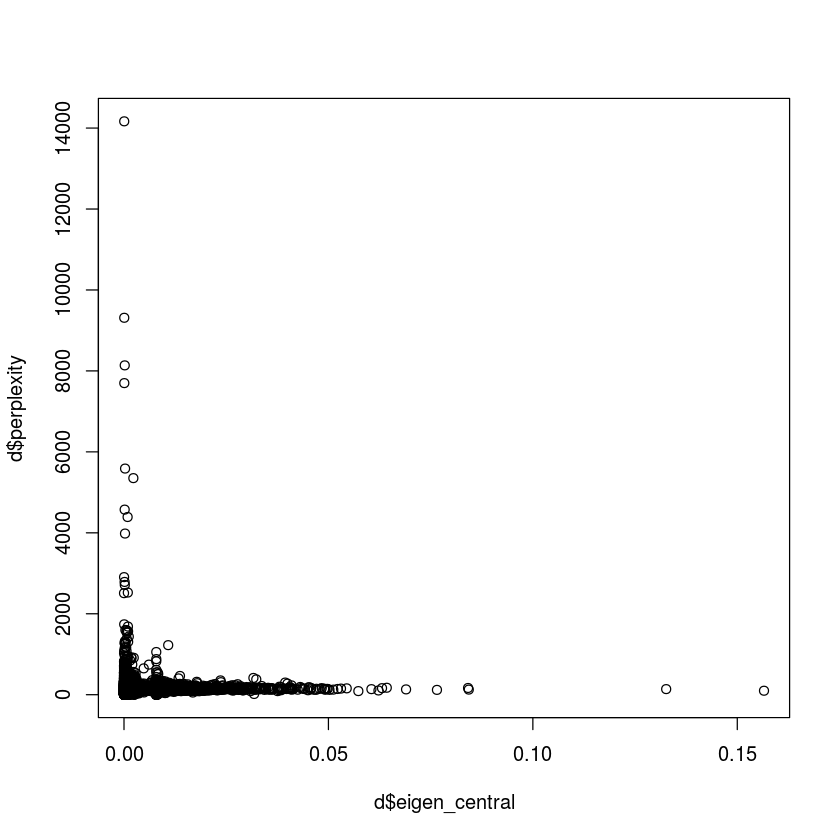

In [21]:
plot(d$eigen_central, d$perplexity)

In [ ]:
t.test(d.)